In [1]:
from pyecharts.charts import Bar3D, Pie, Grid, Bar, Boxplot, Scatter
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode
import random
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba

# 歌手分析

In [2]:
data = pd.read_csv('数据\评论总数2.csv')

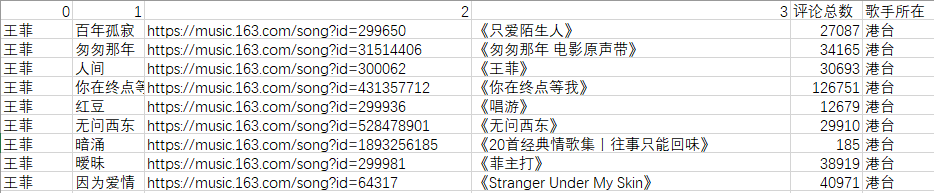

In [3]:
def bar3d_base(d, astr) -> Bar3D:
    
    data = [(i, j, m.pop(), songs.pop()) for i in range(len(d['0'].unique())) for j in range(20)]
    c = (
        Bar3D()
        .add(
            astr,
            [[d[1], d[0], d[2]] for d in data],
            xaxis3d_opts=opts.Axis3DOpts(type_="category"),
            yaxis3d_opts=opts.Axis3DOpts(list(names), type_="category",interval=0),
            zaxis3d_opts=opts.Axis3DOpts(type_="value"),
        )
        .set_global_opts(
            visualmap_opts=opts.VisualMapOpts(max_=300000),
            title_opts=opts.TitleOpts(title="各歌手歌曲评论总数"),
        )
        #.render_notebook()
    )
    return c

In [4]:
d = data[data['歌手所在']=='大陆'].copy()
names = d['0'].unique()
m = list(d['评论总数']).copy()[::-1]
songs = list(d.fillna('未知')['1']).copy()[::-1]
songs = [str(i) for i in songs]
p1 = bar3d_base(d, '内地歌手')

d = data[data['歌手所在']=='港台'].copy()
names = d['0'].unique()
m = list(d['评论总数']).copy()[::-1]
songs = list(d.fillna('未知')['1']).copy()[::-1]
songs = [str(i) for i in songs]
p2 = bar3d_base(d, '港台歌手')

d = data[data['歌手所在']=='欧美'].copy()
names = d['0'].unique()
m = list(d['评论总数']).copy()[::-1]
songs = list(d.fillna('未知')['1']).copy()[::-1]
songs = [str(i) for i in songs]
p3 = bar3d_base(d, '欧美歌手')

d = data[data['歌手所在']=='日韩'].copy()
names = d['0'].unique()
m = list(d['评论总数']).copy()[::-1]
songs = list(d.fillna('未知')['1']).copy()[::-1]
songs = [str(i) for i in songs]
p4 = bar3d_base(d, '日韩歌手')

In [5]:
d = data[data['歌手所在']=='大陆'].copy()
d[d['评论总数']>300000]
#天外来物
#我好想在哪见过你

,0,1,2,3,评论总数,歌手所在
220,薛之谦,我好像在哪见过你,https://music.163.com/song?id=417859631,《尘》,300267,大陆
223,薛之谦,天外来物,https://music.163.com/song?id=1463165983,《天外来物》,459438,大陆
226,薛之谦,我好像在哪见过你,https://music.163.com/song?id=417859631,《绅士》,300267,大陆
480,华晨宇,好想爱这个世界啊 (Live),https://music.163.com/song?id=1436910205,《歌手·当打之年 第9期》,407633,大陆
481,华晨宇,烟火里的尘埃,https://music.163.com/song?id=29004400,《烟火里的尘埃》,325964,大陆
491,华晨宇,好想爱这个世界啊,https://music.163.com/song?id=1407358755,《好想爱这个世界啊》,1391820,大陆


In [6]:
p1.render_notebook()

In [7]:
d = data[data['歌手所在']=='港台'].copy()
d[d['评论总数']>300000]

,0,1,2,3,评论总数,歌手所在
34,陈奕迅,我们,https://music.163.com/song?id=551816010,《我们》,339032,港台


In [8]:
p2.render_notebook()

In [9]:
d = data[data['歌手所在']=='欧美'].copy()
d[d['评论总数']>300000]

,0,1,2,3,评论总数,歌手所在
443,Taylor Swift,Look What You Made Me Do,https://music.163.com/song?id=501133611,《reputation》,657558,欧美


In [10]:
p3.render_notebook()

In [11]:
d = data[data['歌手所在']=='日韩'].copy()
d[d['评论总数']>300000]

,0,1,2,3,评论总数,歌手所在
380,米津玄师,Lemon,https://music.163.com/song?id=536622304,《Lemon》,312101,日韩
420,中岛美嘉,僕が死のうと思ったのは,https://music.163.com/song?id=26830207,《僕が死のうと思ったのは》,533480,日韩


In [12]:
p4.render_notebook()

## 点赞数量

In [28]:
data = pd.read_csv('数据\data2.3.csv',index_col=0)

In [29]:
m = data.groupby('歌曲ID').agg({'点赞':sum})
m = m.sort_values('点赞',ascending=False)
m = m.head(100)
res = []
for i in range(0,3000000,200000):
    a = i + 200000
    res.append(len([j for j in m['点赞'] if j>i and j<a]))
res #[22, 41, 18, 5, 5, 4, 1, 1, 0, 0, 2, 0, 0, 0, 1]
c2 = (
    Bar()
    .add_xaxis([str(i) for i in range(0,3000000,200000)])
    .add_yaxis("", [int(i) for i in res])
    .set_global_opts(title_opts=opts.TitleOpts(title="评论点赞最多歌", subtitle="前100首"))
)
c2.render_notebook()

In [30]:
mm = pd.read_csv('数据/评论总数2.csv')
mm['id'] = mm['2'].apply(lambda x:x[30:])
m['id'] = m.index.astype(str)
m = pd.merge(m, mm[['id','1']])
m = m.drop_duplicates().copy()
m.sort_values('点赞',inplace=True)

In [31]:
c2 = (
    Scatter()
    .add_xaxis([str(i) for i in m['1']])
    .add_yaxis("", [int(i) for i in m['点赞']],label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(title_opts=opts.TitleOpts(title="评论点赞最多歌", subtitle="前100首"))
)
c2.render_notebook()

In [32]:
m = pd.read_csv('数据\点赞top100数目分布.csv',header=None,index_col=0)
m = m.sort_values(1,ascending=False)

In [33]:
x_data = m.index
y_data = [69, 22, 9]
data_pair = [list(z) for z in zip(x_data, y_data)]
data_pair.sort(key=lambda x: x[1])

(
    Pie(init_opts=opts.InitOpts(width="800px", height="400px"))
    .add(
        series_name="点赞数量",
        data_pair=data_pair,
        rosetype="radius",
        radius="55%",
        center=["50%", "50%"],
        label_opts=opts.LabelOpts(is_show=False, position="center"),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="歌曲评论点赞数量",
            pos_left="center",
            pos_top="20",
            title_textstyle_opts=opts.TextStyleOpts(),
        ),
        #legend_opts=opts.LegendOpts(is_show=False),
    )
    .set_series_opts(
        tooltip_opts=opts.TooltipOpts(
            trigger="item", formatter="{a} <br/>{b}: {c} ({d}%)"
        ),
        label_opts=opts.LabelOpts(),
    )
    .render_notebook()
)

# 用户分析

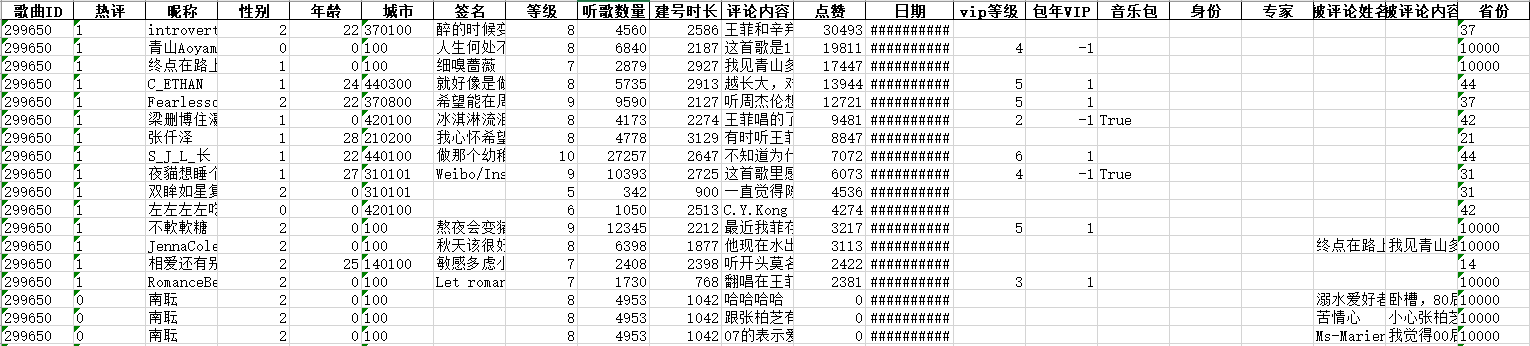

## 年龄

In [14]:
data = pd.read_csv('数据\data2.3.csv',index_col=0)
user = data[[ '昵称', '性别', '年龄', '城市', '签名', '等级', '听歌数量', '建号时长', '身份', '专家','vip等级']].copy()
user1 = user.drop_duplicates().copy()
user1['vip等级'].fillna(0,inplace=True)
a = user1.groupby('年龄').agg({'性别':[lambda x:(x==0).sum(), lambda x:(x==1).sum(), lambda x:(x==2).sum()]})
a.columns = ['未知','男','女']
a

,未知,男,女
年龄,,,
0,22015,38657,53124
1,20,82,93
2,12,66,88
3,5,44,59
4,4,19,27
5,7,18,21
6,7,18,24
7,1,23,27
8,11,59,109


In [15]:
c1 = a.index
c1 = [int(i) for i in c1][1:]
c2 = [int(i) for i in a['未知']][1:]
c3 = [int(i) for i in a['男']][1:]
c4 = [int(i) for i in a['女']][1:]

In [16]:
p = (
    Bar()
    .add_xaxis(c1)
    .add_yaxis("未知", c2)
    .add_yaxis("男", c3)
    .add_yaxis("女", c4)
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(title_opts=opts.TitleOpts(title="网易云音乐用户年龄分布", subtitle="网易云音乐的用户永远18岁"),toolbox_opts=opts.ToolboxOpts())
    .render_notebook()
)
p

## 性别

In [236]:
data1 = pd.read_csv('性别比.csv', index_col=0)
data1

,18岁以下,18-22岁,23-30岁,31-40岁,40岁以上
未知,1327,884,1792,161,20
男,10739,9091,10685,1340,162
女,13572,7246,6128,442,49


In [237]:
data1['合计'] = data1.sum(axis=1)
data1

,18岁以下,18-22岁,23-30岁,31-40岁,40岁以上,合计
未知,1327,884,1792,161,20,4184
男,10739,9091,10685,1340,162,32017
女,13572,7246,6128,442,49,27437


In [238]:
data1 = pd.read_csv(r'数据\按年龄分层后的性别分布.csv',header=None)
#data.groupby(1).agg({2:sum})
a = pd.DataFrame([data1[data1[0]==i].sort_values(1)[2].values for i in range(6)], columns=['女','未知','男'],
                 index=['未知','18岁以下','19-22岁','23-30岁','31-40岁','41岁以上'])
a = a[['男','女','未知']].copy()
a = a.sort_index()
a
a['总和'] = a[['男','女','未知']].sum(axis=1)
a

,男,女,未知,总和
18岁以下,13949,16869,1724,32542
19-22岁,9302,7355,903,17560
23-30岁,10942,6245,1830,19017
31-40岁,1382,453,162,1997
41岁以上,173,50,20,243
未知,39402,53853,22360,115615


In [239]:
list2 = [
    {'value': int(a['男'][i]), 'percent':float((a['男']/a['总和'])[i])} for i in range(6)
]

list3 = [
    {'value': int(a['女'][i]), 'percent':float((a['女']/a['总和'])[i])} for i in range(6)
]

list4 = [
    {'value': int(a['未知'][i]), 'percent':float((a['未知']/a['总和'])[i])} for i in range(6)
]

In [240]:
data = pd.read_csv('数据\data2.3.csv',index_col=0)
def gender_mi():       #性别展示 环形图

    cate_1 = ['女', '男', '未知']
    data_1 = [84825,75150, 26999]

    pie = (Pie(init_opts=opts.InitOpts(theme=ThemeType.ROMA))
           .add('', [list(z) for z in zip(cate_1, data_1)],
                radius=["30%", "50%"],		#控制内外半径，即图的大小
                rosetype="radius",		#表明是玫瑰图，半径跟数值挂钩
                center=["50%", "25%"])		#饼图中心的位置，即整个图的位置。格式：[左右，上下]
                
           #.set_global_opts(title_opts=opts.TitleOpts(title="喜欢mi_10_young人群性别", subtitle="有效数据约900人", pos_left='5%'),
            #                legend_opts=opts.LegendOpts(pos_left="35%"))
            
           .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%"))

           )
    return pie
    
def age_gender_mi():

    from pyecharts.commons.utils import JsCode
    from pyecharts.globals import ThemeType


    c = (
        Bar(init_opts=opts.InitOpts(theme=ThemeType.ROMA, width='1000px', height='700px'), )
            .add_xaxis(['<18岁', '19-22岁', '23-30岁', '31-40岁', '>40岁','未知'])
            .add_yaxis("女", list3, stack="stack1", category_gap="50%")
            .add_yaxis("男", list2, stack="stack1", category_gap="50%")
            .add_yaxis("未知", list4, stack="stack1", category_gap="50%")
            .set_series_opts(
            label_opts=opts.LabelOpts(
                position="right",
                formatter=JsCode(
                    "function(x){return Number(x.data.percent * 100).toFixed() + '%';}"
                ),
            )
        )
            .set_global_opts(title_opts=opts.TitleOpts(title="用户年龄段及性别分布", subtitle="18岁以下的女性为主力军", pos_left='5%'),toolbox_opts=opts.ToolboxOpts())

    )

    c2=gender_mi()		#把环图读进来
    c.overlap(c2)		#两个图重叠
    return c


In [241]:
b = age_gender_mi()
b.render_notebook()

# 每天评论时间

In [242]:
data['hour'] = pd.to_datetime(data['日期']).dt.hour
res = data['hour'].value_counts()
res = res.sort_index()

In [243]:
x_data = [str(i)+':30' for i in res.index]
y_data = [int(i) for i in res]

In [244]:
import pyecharts.options as opts
from pyecharts.charts import Line


(
    Line(init_opts=opts.InitOpts(width="900px", height="600px"))
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="时间分布",
        y_axis=y_data,
        is_smooth=True,
        label_opts=opts.LabelOpts(is_show=False),
        linestyle_opts=opts.LineStyleOpts(width=2),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="网易云评论分布", subtitle="每天晚上九点准时晚高峰"),
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),
        xaxis_opts=opts.AxisOpts(boundary_gap=False),
        yaxis_opts=opts.AxisOpts(
            axislabel_opts=opts.LabelOpts(formatter="{value} W"),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
        visualmap_opts=opts.VisualMapOpts(
            is_piecewise=True,
            dimension=0,
            pieces=[

                {"gt": 0, "lte": 21, "color": "green"},
                {"gt": 21, "color": "red"}
            ],
        ),
    )
    .set_series_opts(
        markarea_opts=opts.MarkAreaOpts(
            data=[
                opts.MarkAreaItem(name="午高峰", x=("12:30", "14:30")),
                opts.MarkAreaItem(name="晚高峰", x=("18:30", "23:30")),
            ]
        )
    )
    .render_notebook()
)


# 听歌数量、用户等级和VIP等级分布

## 听歌数量与vip等级的关联

In [26]:
ys = []
for i in range(7):
    ys.append([int(j) for j in user1['听歌数量'][user1['vip等级']==i]])

In [27]:
user1['vip等级'].value_counts()

0.0    103311
5.0     24883
6.0     15495
3.0     13465
4.0     11009
2.0      8463
1.0      7405
Name: vip等级, dtype: int64

In [28]:
y_data = []
for i in ys:
    lower_q=np.quantile(i,0.25,interpolation='lower')#下四分位数
    higher_q=np.quantile(i,0.75,interpolation='higher')#上四分位数
    y_data.append([j for j in i if j >= lower_q and j <= higher_q])

In [29]:
box_plot = Boxplot()

box_plot = (
    box_plot.add_xaxis(xaxis_data=["vip0", "vip1", "vip2", "vip3", "vip4",'vip5','vip6'])
    .add_yaxis(series_name="", y_axis=box_plot.prepare_data(y_data))
    .set_global_opts(
        title_opts=opts.TitleOpts(
            pos_left="center", title="网易云用户听歌数量与黑胶VIP等级的关联"
        ),
        tooltip_opts=opts.TooltipOpts(trigger="item", axis_pointer_type="shadow"),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            boundary_gap=True,
            splitarea_opts=opts.SplitAreaOpts(is_show=False),
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
            splitline_opts=opts.SplitLineOpts(is_show=False),
        ),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            name="研究发现多听歌可以提升VIP等级",
            splitarea_opts=opts.SplitAreaOpts(
                is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1)
            ),
        ),
    )
    .set_series_opts(tooltip_opts=opts.TooltipOpts(formatter="{b}: {c}"))
)
box_plot.render_notebook()

## 听歌数量与等级的关联

In [30]:
ys = []
for i in range(11):
    ys.append([int(j) for j in user1['听歌数量'][user1['等级']==i]])

In [31]:
y_data = []
for i in ys:
    lower_q=np.quantile(i,0.25,interpolation='lower')#下四分位数
    higher_q=np.quantile(i,0.75,interpolation='higher')#上四分位数
    y_data.append([j for j in i if j >= lower_q and j <= higher_q])

In [32]:
box_plot2 = Boxplot()

box_plot2 = (
    box_plot2.add_xaxis(xaxis_data=[str(i)+'级' for i in range(11)])
    .add_yaxis(series_name="", y_axis=box_plot.prepare_data(y_data))
    .set_global_opts(
        title_opts=opts.TitleOpts(
            pos_left="center", title="网易云用户听歌数量与等级的关联"
        ),
        tooltip_opts=opts.TooltipOpts(trigger="item", axis_pointer_type="shadow"),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            boundary_gap=True,
            splitarea_opts=opts.SplitAreaOpts(is_show=False),
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
            splitline_opts=opts.SplitLineOpts(is_show=False),
        ),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            name="研究发现多听歌可以提升等级",
            splitarea_opts=opts.SplitAreaOpts(
                is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1)
            ),
        ),
    )
    .set_series_opts(tooltip_opts=opts.TooltipOpts(formatter="{b}: {c}"))
)
box_plot2.render_notebook()

## 采用对数

In [33]:
ys = []
for i in range(11):
    ys.append([float(j) for j in np.log2(user1['听歌数量']+1)[user1['等级']==i]])

In [34]:
y_data = []
for i in ys:
    lower_q=np.quantile(i,0.25,interpolation='lower')#下四分位数
    higher_q=np.quantile(i,0.75,interpolation='higher')#上四分位数
    y_data.append([j for j in i if j >= lower_q and j <= higher_q])

In [35]:
box_plot1 = Boxplot()
box_plot1 = (
    box_plot1.add_xaxis(xaxis_data=[str(i)+'级' for i in range(11)])
    .add_yaxis(series_name="", y_axis=box_plot.prepare_data(y_data))
    .set_global_opts(
        #title_opts=opts.TitleOpts(
            #pos_left="center", title="网易云用户对数听歌数量与等级的关联"),
        tooltip_opts=opts.TooltipOpts(trigger="item", axis_pointer_type="shadow"),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            boundary_gap=True,
            splitarea_opts=opts.SplitAreaOpts(is_show=False),
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
            splitline_opts=opts.SplitLineOpts(is_show=False),
        ),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            name="研究发现多听歌可以提升等级",
            splitarea_opts=opts.SplitAreaOpts(
                is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1)
            ),
        ),
    )
    .set_series_opts(tooltip_opts=opts.TooltipOpts(formatter="{b}: {c}"))
)
#box_plot1.render_notebook()

In [36]:
grid = (
    Grid()
    .add(box_plot, grid_opts=opts.GridOpts(pos_left="55%"))
    .add(box_plot1, grid_opts=opts.GridOpts(pos_right="55%"))
    .render_notebook()
)
grid

# 网易云用户的地区分布

In [37]:
m = pd.read_csv('数据\地区分布.csv',header=None)

In [38]:
v = m[0]
c = (
    Pie(init_opts=opts.InitOpts(theme=ThemeType.ROMA, width='1000px', height='1100px'))
    .add(
        '用户数量',
        [list(z) for z in zip(v, [int(i) for i in m[1]])],
        radius=["30%", "75%"],
        center=["50%", "50%"],
        rosetype="radius",
        
        #label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="网易云音乐用户地域分布图"))
    .set_series_opts(tooltip_opts=
                     opts.TooltipOpts(trigger="item", formatter="{a} <br/>{b}: {c} ({d}%)"))
    .render_notebook()
)
c

## VIP等级分布与账号等级分布

In [246]:
m = user1['等级'].value_counts()
m1 = m.sort_index()
m = user1['vip等级'].value_counts()
m2 = m.sort_index()

In [247]:
m = user1['vip等级'].value_counts()
c2 = (
    Bar()
    .add_xaxis([str(i) for i in m1.index])
    .add_yaxis("", [int(i) for i in m1])
    #.set_global_opts(title_opts=opts.TitleOpts(title="Bar-基本示例", subtitle="我是副标题"))
    #.render("bar_base.html")
)
c2.render_notebook()


c1 = (
    Bar()
    .add_xaxis(['vip'+str(int(i)) for i in m2.index])
    .add_yaxis("", [int(i) for i in m2])
    .set_global_opts(title_opts=opts.TitleOpts(title="等级分布与VIP等级分布", subtitle="VIP5真是一道天堑"))
    #.render("bar_base.html")
)
c1.render_notebook()

grid = (
    Grid()
    .add(c1, grid_opts=opts.GridOpts(pos_left="55%"))
    .add(c2, grid_opts=opts.GridOpts(pos_right="55%"))
    .render_notebook()
)
grid

In [40]:
v = ('vip'+str(int(i)) for i in m.index)
c = (
    Pie(init_opts=opts.InitOpts(theme=ThemeType.ROMA, width='800px', height='800px'))
    .add(
        'VIP等级',
        [list(z) for z in zip(v, [int(i) for i in m])],
        radius=["30%", "75%"],
        center=["50%", "50%"],
        rosetype="radius",
        
        #label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="VIP等级分布图"))
    .set_series_opts(tooltip_opts=
                     opts.TooltipOpts(trigger="item", formatter="{a} <br/>{b}: {c} ({d}%)"))
    .render_notebook()
)
c

In [41]:
m = user1['等级'].value_counts()
v = (str(int(i)) for i in m.index)
c = (
    Pie(init_opts=opts.InitOpts(theme=ThemeType.ROMA, width='800px', height='800px'))
    .add(
        '等级',
        [list(z) for z in zip(v, [int(i) for i in m])],
        radius=["30%", "75%"],
        center=["50%", "50%"],
        rosetype="radius",
        
        #label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="网易云音乐用户等级分布图"))
    .set_series_opts(tooltip_opts=
                     opts.TooltipOpts(trigger="item", formatter="{a} <br/>{b}: {c} ({d}%)"))
)
c.render_notebook()

# 文本分析

In [124]:
words = pd.read_csv('数据\chineseStopWords.txt', encoding='gbk', sep='\t', names=['stopword'])
# 分词
# 设置文本随机颜色
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h, s, l = random.choice([(188, 72, 53), (253, 63, 56), (12, 78, 69)])
    return "hsl({}, {}%, {}%)".format(h, s, l)

text = ''
for line in data['评论内容']:
    text += ' '.join(jieba.cut(str(line), cut_all=False))
# 停用词
stopwords = set('')
stopwords.update(words['stopword'])
backgroud_Image = plt.imread('music.jpg')

In [125]:
wc = WordCloud(
    background_color='white',
    mask=backgroud_Image,
    font_path='华康俪金黑W8.TTF',
    max_words=2000,
    max_font_size=250,
    min_font_size=15,
    color_func=random_color_func,
    prefer_horizontal=1,
    random_state=50,
    stopwords=stopwords,
    scale=6
)

In [126]:
wc.generate_from_text(text)
wc.to_file("整体词云图.jpg")

[('喜欢', 10953), ('听', 10781), ('首歌', 10592), ('爱', 8898), ('想', 7948), ('一个', 7607), ('好', 7170), ('真的', 6352), ('歌', 5664), ('没', 4304), ('感觉', 4022), ('唱', 4006), ('希望', 3854), ('好听', 3148), ('走', 2631), ('听到', 2263), ('永远', 2262), ('评论', 2204), ('生活', 2157), ('加油', 2071), ('IU', 2045), ('好像', 1961), ('别人', 1826), ('发现', 1816), ('爱情', 1806), ('世界', 1801), ('哭', 1697), ('开心', 1633), ('流泪 流泪', 1628), ('岁', 1601), ('声音', 1561), ('懂', 1557), ('很多', 1512), ('不想', 1438), ('时间', 1435), ('可爱', 1432), ('多多 大笑', 1423), ('华晨 宇', 1403), ('版本', 1383), ('朋友', 1382), ('幸福', 1362), ('写', 1361), ('想起', 1332), ('记得', 1329), ('歌词', 1321), ('谢谢', 1300), ('大哭 大哭', 1276), ('找', 1272), ('大哭', 1262), ('努力', 1246)]
生成词云成功!


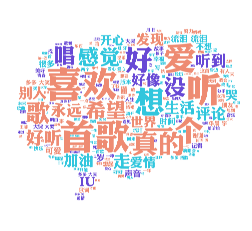

In [127]:
# img_colors = ImageColorGenerator(backgroud_Image)
# 看看词频高的有哪些
process_word = WordCloud.process_text(wc, text)
sort = sorted(process_word.items(), key=lambda e: e[1], reverse=True)
print(sort[:50])
plt.imshow(wc)
plt.axis('off')
print('生成词云成功!')

# 关键词

In [123]:
from matplotlib import colors

In [58]:
s = data.copy()
s['评论内容'] = s['评论内容'].astype(str)

In [192]:
guanjian = pd.read_csv('数据\关键词2.csv')
g1 = guanjian['关键词']
#guanjian = pd.read_excel('数据\关键词.xlsx')
#g1 = guanjian['关键词']

In [193]:
res = {}
for i in g1:
    res[i] = (s['评论内容'].apply(lambda x:i in x)).sum()

In [120]:
w = WordCloud(
    background_color='white',
    mask=backgroud_Image,
    font_path='华康俪金黑W8.TTF',
    max_words=2000,
    max_font_size=250,
    min_font_size=15,
    color_func=random_color_func,
    prefer_horizontal=1,
    random_state=50,
    stopwords=stopwords,
    scale=6
)

In [194]:
sorted(res.items(),key=lambda x:x[1],reverse=True)

[('学', 6479),
 ('家', 6170),
 ('加油', 5458),
 ('岁', 3258),
 ('死', 3095),
 ('考', 3008),
 ('爱你', 2563),
 ('时间', 2469),
 ('爱情', 2300),
 ('华晨宇', 2273),
 ('在一起', 2154),
 ('李宗盛', 1816),
 ('想你', 1787),
 ('妈', 1695),
 ('周深', 1680),
 ('毛', 1656),
 ('IU', 1651),
 ('难过', 1572),
 ('回来', 1567),
 ('王菲', 1422),
 ('感情', 1392),
 ('结婚', 1316),
 ('冲', 1300),
 ('曾经', 1278),
 ('青春', 1252),
 ('未来', 1220),
 ('恋爱', 1204),
 ('遗憾', 1096),
 ('分手', 1071),
 ('回忆', 1052),
 ('哭了', 1044),
 ('离开', 1008),
 ('霉霉', 1004),
 ('怀念', 892),
 ('失去', 857),
 ('回家', 856),
 ('高中', 855),
 ('爸', 846),
 ('孤独', 755),
 ('阿呆', 753),
 ('放弃', 729),
 ('花花', 695),
 ('毛不易', 685),
 ('杨千嬅', 676),
 ('坚持', 669),
 ('工作', 657),
 ('张学友', 643),
 ('后悔', 619),
 ('孙燕姿', 619),
 ('姐姐', 591),
 ('初中', 590),
 ('学习', 590),
 ('喜欢的人', 589),
 ('错过', 586),
 ('宇多田光', 576),
 ('娘', 573),
 ('小时候', 570),
 ('心动', 547),
 ('记忆', 547),
 ('高考', 531),
 ('考研', 530),
 ('难受', 529),
 ('痛苦', 524),
 ('爱的人', 503),
 ('珍惜', 501),
 ('上岸', 487),
 ('家人', 476),
 ('浪漫', 467),
 ('成功', 457)

In [122]:
w.fit_words(res)
w.to_file("ciyun.png")

## 各个分类词云图

In [188]:
guanjian = pd.read_csv('数据\关键词2.csv')

In [189]:
ty = '爱情'
g1 = guanjian['关键词'][guanjian['情感类别']==ty]
s[ty] = False
for i in g1:
    s.loc[s['评论内容'].apply(lambda x: i in x), ty] = True
text = ''
for line in s['评论内容'][s[ty]]:
    text += ' '.join(jieba.cut(str(line), cut_all=False))
# 停用词
stopwords = set('')
stopwords.update(words['stopword'])
backgroud_Image = plt.imread('music.jpg')
wc.generate_from_text(text)
wc.to_file(f"分类{ty}词云.jpg")

In [84]:
for ty in guanjian['情感类别'].unique():
    g1 = guanjian['关键词'][guanjian['情感类别']==ty]
    s[ty] = False
    for i in g1:
        s.loc[s['评论内容'].apply(lambda x: i in x), ty] = True
    text = ''
    for line in s['评论内容'][s[ty]]:
        text += ' '.join(jieba.cut(str(line), cut_all=False))
    # 停用词
    stopwords = set('')
    stopwords.update(words['stopword'])
    backgroud_Image = plt.imread('music.jpg')
    wc.generate_from_text(text)
    wc.to_file(f"分类{ty}词云.jpg")

## 你 词云图

In [78]:
text = ''
for line in s['评论内容'][s['评论内容'].apply(lambda x:'你' in x)]:
    text += ' '.join(jieba.cut(str(line), cut_all=False))
# 停用词
stopwords = set('')
stopwords.update(words['stopword'])
backgroud_Image = plt.imread('music.jpg')
wc.generate_from_text(text)
wc.to_file("分类你词云.jpg")

## 她/他/Ta/ta 词云图

In [79]:
ta = (s['评论内容'].apply(lambda x:'他' in x))|(s['评论内容'].apply(lambda x:'ta' in x))|(s['评论内容'].apply(lambda x:'Ta' in x))|(s['评论内容'].apply(lambda x:'她' in x))
text = ''
for line in s['评论内容'][ta]:
    text += ' '.join(jieba.cut(str(line), cut_all=False))
# 停用词
stopwords = set('')
stopwords.update(words['stopword'])
backgroud_Image = plt.imread('music.jpg')
wc.generate_from_text(text)
wc.to_file("分类ta词云.jpg")

# 为什么网抑云

In [195]:
a = zip(guanjian['情感类别'].unique(),('#CF8C93','#6B696E','#E8D5C4','#FF7F50','#FF0000','#FFE4C4','#59999E'))
#粉色'#CF8C93'，灰色'#6B696E'，米色'#E8D5C4'，橙色'#FF7F50'，大红色'#FF0000'，浅米色'#FFE4C4'，绿色'#59999E'
colordict = dict(a)

In [224]:
colordict

{'爱情': '#CF8C93',
 '负能量': '#6B696E',
 '回忆': '#E8D5C4',
 '梦想': '#FF7F50',
 '亲情': '#FF0000',
 '事业': '#FFE4C4',
 '喜爱的歌手': '#59999E'}

In [196]:
def f(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    leibie = guanjian['情感类别'][guanjian['关键词']==word].values[0]
    return colordict[leibie]

In [197]:
m = WordCloud(
    background_color='white',
    mask=backgroud_Image,
    font_path='华康俪金黑W8.TTF',
    max_words=2000,
    max_font_size=250,
    min_font_size=15,
    color_func=f,
    prefer_horizontal=1,
    random_state=50,
    stopwords=stopwords,
    scale=6
)

学
家
加油
岁
死
考
爱你
时间
爱情
华晨宇
在一起
李宗盛
想你
妈
周深
毛
IU
难过
回来
王菲
感情
结婚
冲
曾经
青春
未来
恋爱
遗憾
分手
回忆
哭了
离开
霉霉
怀念
失去
回家
高中
爸
孤独
阿呆
放弃
花花
毛不易
杨千嬅
坚持
工作
张学友
后悔
孙燕姿
姐姐
初中
学习
喜欢的人
错过
宇多田光
娘
小时候
心动
记忆
高考
考研
难受
痛苦
爱的人
珍惜
上岸
家人
浪漫
成功
博
英语
表白
小学
想念
Adele
哥哥
思念
娶
嫁
想他
忘不了
上学
奶奶
单词
男友
盼
母亲
女友
情书
中考
前任
离婚
读书
想她
独自
爷爷
陈奕迅
记录
破防
无所谓
妹妹
恋人
崩溃
数学
上班
生物
好感
父亲
回想
公司
绝望
前男友
童年
弟弟
折磨
前女友
丧
不甘心
道别
阿姨
年轻时
奋斗
同桌
爹
语文
ex
外婆
图书馆
亲人
薛之谦
重逢
老板
七夕
难熬
硕
同事
梁静茹
邓紫棋
周华健
大学时
备考
倒计时
不顺
政治
本科
一见钟情
动情
叔叔
打工
窒息
好怕
专升本
工资
好冷
自杀
现任
脱单
姥姥
外公
化学
面试
淡了
堕落
Taylor Swift
重蹈覆辙
癌症
中岛美嘉


(-0.5, 9959.5, 9077.5, -0.5)

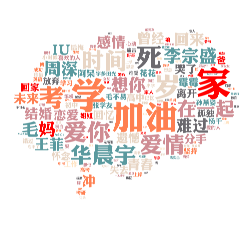

In [198]:
m.fit_words(res)
plt.imshow(m)
plt.axis('off')

In [200]:
m.to_file("关键词词云.jpg")

In [204]:
mm = {}
for i in res:
    leibie = guanjian['情感类别'][guanjian['关键词']==i].values[0]
    mm[leibie] = mm.get(leibie,0) + res[i]
mm

{'爱情': 19401,
 '负能量': 11040,
 '回忆': 20760,
 '梦想': 23461,
 '亲情': 13183,
 '事业': 1246,
 '喜爱的歌手': 17191}

In [206]:
mm.items()

dict_items([('爱情', 19401), ('负能量', 11040), ('回忆', 20760), ('梦想', 23461), ('亲情', 13183), ('事业', 1246), ('喜爱的歌手', 17191)])

In [218]:
type(data_pair[0][1])

numpy.int64

In [212]:
data_pair

[['大于100w', 9], ['50w-100w', 22], ['小于50w', 69]]

In [220]:
data_pair = list(mm.items())
data_pair.sort(key=lambda x: x[1], reverse=True)
data_pair = [(i[0],int(i[1])) for i in data_pair]

(
    Pie(init_opts=opts.InitOpts(width="800px", height="400px"))
    .add(
        series_name="评论种类",
        data_pair=data_pair,
        rosetype="radius",
        radius="55%",
        center=["50%", "50%"],
        label_opts=opts.LabelOpts(is_show=False, position="center"),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="歌曲评论种类分布",
            pos_left="center",
            pos_top="20",
            title_textstyle_opts=opts.TextStyleOpts(),
        ),
        #legend_opts=opts.LegendOpts(is_show=False),
    )
    .set_series_opts(
        tooltip_opts=opts.TooltipOpts(
            trigger="item", formatter="{a} <br/>{b}: {c} ({d}%)"
        ),
        label_opts=opts.LabelOpts(),
    )
    .render_notebook()
)